In [1]:
!pip install textblob
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv("Twitter_data.csv")

In [5]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
df.shape

(162980, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


*Mapping*

In [8]:
df["Sentiment"] = df["category"].map({
    -1: "Negative",
     0: "Neutral",
     1: "Positive"
})



*Text Cleaning*

In [9]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+","",text)
    text = re.sub(r"[^a-zA-Z ]","",text)
    text = re.sub(r"\s+"," ",text)
    return text

df["processed_text"] = df["clean_text"].apply(clean_text)


*Sentiment Distribution Visualization*

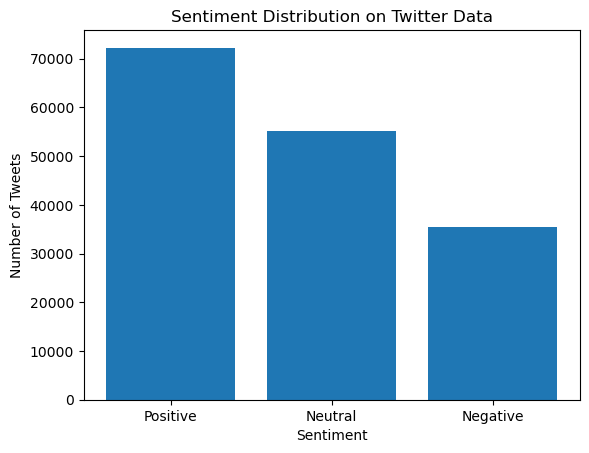

In [10]:
sentiment_count = df["Sentiment"].value_counts()

plt.figure()
plt.bar(sentiment_count.index, sentiment_count.values)
plt.title("Sentiment Distribution on Twitter Data")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


*Wordcloud : Positive tweets*

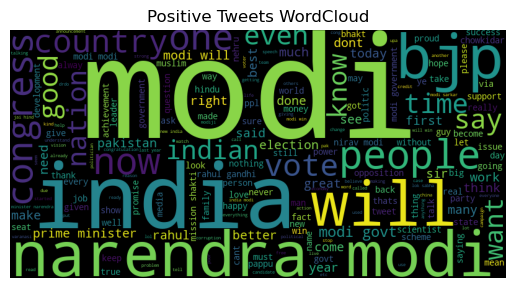

In [11]:
positive_text = " ".join(df[df["Sentiment"]=="Positive"]["processed_text"])

wc = WordCloud(width=800, height=400).generate(positive_text)

plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.title("Positive Tweets WordCloud")
plt.show()


*Wordcloud : negative Tweets*

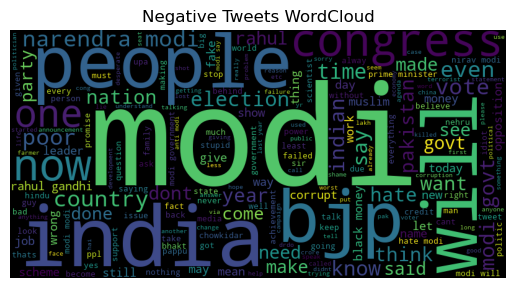

In [12]:
negative_text = " ".join(df[df["Sentiment"]=="Negative"]["processed_text"])

wc = WordCloud(width=800, height=400).generate(negative_text)

plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.title("Negative Tweets WordCloud")
plt.show()


*Neutral tweets Wordcloud*

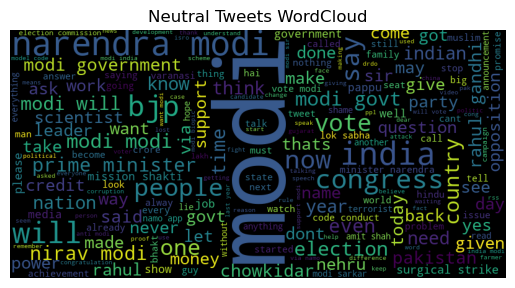

In [13]:
neutral_text = " ".join(df[df["Sentiment"]=="Neutral"]["processed_text"])

wc = WordCloud(width=800, height=400).generate(neutral_text)

plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.title("Neutral Tweets WordCloud")
plt.show()


In [14]:
df.to_csv("sentiment_analysis_output.csv", index=False)
